In [ ]:
from google.colab import drive
drive.mount('/drive/')

Drive already mounted at /drive/; to attempt to forcibly remount, call drive.mount("/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data_x = pd.read_csv('/drive/My Drive/varmole/x_rosmap_whole_gene_expression.csv')

In [ ]:

data_y = pd.read_csv('/drive/My Drive/varmole/y_rosmap_whole_gene_expression.csv')

In [ ]:
data_x = data_x.set_index('probe')

In [ ]:
data_x.isnull().values.any()

False

In [ ]:
data_x = data_x.T

In [ ]:
j = data_y.T

In [ ]:
j.value_counts()

0    141
1     95
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_normalized = MinMaxScaler().fit_transform(data_x.values)
X = pd.DataFrame(X_normalized)


In [ ]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5315,5316,5317,5318,5319,5320,5321,5322,5323,5324,5325,5326,5327,5328,5329,5330,5331,5332,5333,5334,5335,5336,5337,5338,5339,5340,5341,5342,5343,5344,5345,5346,5347,5348,5349,5350,5351,5352,5353,5354
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,...,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,0.910207,0.911148,0.843664,0.923878,0.946197,0.937013,0.921427,0.815653,0.961089,0.936599,0.900073,0.913216,0.919066,0.811713,0.845575,0.788564,0.363486,0.831699,0.857013,0.823090,0.840241,0.940690,0.893983,0.919141,0.914051,0.902044,0.929667,0.761035,0.952887,0.941718,0.921438,0.719019,0.771501,0.923816,0.830313,0.953733,0.933071,0.839070,0.935643,0.947999,...,0.501740,0.595769,0.333921,0.570332,0.345044,0.501798,0.485881,0.589221,0.358397,0.407321,0.490180,0.607595,0.482209,0.560345,0.339715,0.504618,0.584759,0.531218,0.311455,0.296116,0.712951,0.299770,0.539409,0.615477,0.430810,0.211589,0.463002,0.314009,0.691130,0.537156,0.310528,0.565093,0.574346,0.501859,0.360919,0.367074,0.404184,0.495294,0.172054,0.578021
std,0.064282,0.069060,0.073674,0.066822,0.064004,0.063893,0.064670,0.067905,0.063921,0.065365,0.066014,0.064460,0.063902,0.085358,0.075497,0.074245,0.140882,0.092084,0.076659,0.073759,0.073999,0.064037,0.064267,0.063215,0.064592,0.066414,0.065589,0.080874,0.063507,0.065099,0.063004,0.090888,0.107506,0.064092,0.072285,0.064125,0.064256,0.062835,0.065849,0.064851,...,0.161208,0.180524,0.092153,0.158314,0.119051,0.167614,0.127224,0.144026,0.113201,0.109441,0.173436,0.170312,0.176740,0.143224,0.129131,0.154208,0.186279,0.151220,0.101136,0.108154,0.100819,0.107772,0.130484,0.135514,0.132109,0.086565,0.212332,0.084245,0.108511,0.161321,0.107374,0.168365,0.174259,0.153330,0.107134,0.150391,0.155203,0.133629,0.081952,0.154622
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.899935,0.891351,0.813363,0.911440,0.939640,0.929021,0.909439,0.788764,0.957776,0.925883,0.885536,0.901046,0.911669,0.774003,0.809697,0.760742,0.267858,0.785416,0.830543,0.790713,0.812544,0.932447,0.880481,0.908705,0.903888,0.888595,0.918977,0.723956,0.949082,0.931984,0.913520,0.675190,0.712096,0.913856,0.805706,0.947469,0.924038,0.824728,0.924391,0.938687,...,0.397360,0.490323,0.284585,0.470028,0.274348,0.399873,0.422548,0.503856,0.289903,0.352785,0.374734,0.489882,0.370316,0.479079,0.257319,0.403580,0.490927,0.451474,0.252227,0.236324,0.660579,0.243661,0.475130,0.542376,0.360456,0.168122,0.309448

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,data_y.values.ravel(), test_size=0.2, random_state=22)

In [ ]:
X.shape

(236, 5355)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,recall_score,precision_score,log_loss,roc_auc_score,roc_curve

In [ ]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=1000,penalty='l2')
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
lr = accuracy_score(predictions,y_test)
f1_lr = f1_score(y_test,predictions,average='weighted')
cm_lr = confusion_matrix(y_test,predictions)
recall_lr = recall_score(y_test,predictions)
fpr, tpr, threshold = roc_curve(y_test,predictions)
auc_score_lr = roc_auc_score(y_test,predictions)
print(lr) #accuracy score
print(f1_lr) #f1 score
print(cm_lr) #confusion matrix
print(recall_lr) #recall
print(auc_score_lr) #auc score

0.8125
0.8132591093117408
[[24  5]
 [ 4 15]]
0.7894736842105263
0.808529945553539


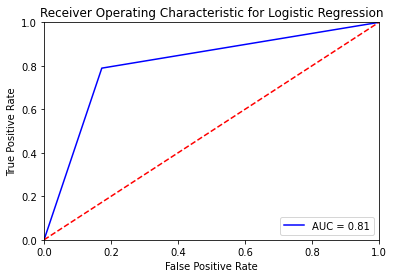

In [ ]:
#ROC curve
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_score_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

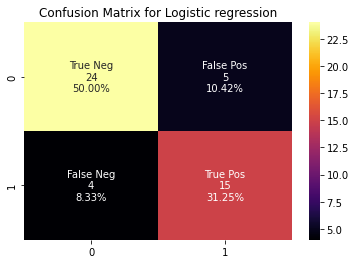

In [ ]:
#Confusion Matrix for logistic regression
plt.title('Confusion Matrix for Logistic regression')
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm_lr.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_lr.flatten()/np.sum(cm_lr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_lr, annot=labels, fmt='', cmap='inferno')
plt.show()

In [ ]:
#Support Vector Machine

from sklearn.svm import SVC

kernel=["linear","poly","rbf","sigmoid"]
cost = [.001,.01,.1,1,10,100,1000]

m = []
f= []

for k in kernel:
    ker = k
    for c in cost:
        cos = c
        accu=[]
        f1_scores = []
        
        for i in range(10):
            clf2 = SVC(kernel=ker,gamma="auto",C=cos)
            clf2.fit(x_train,y_train)
            a = accuracy_score(clf2.predict(x_test),y_test)             
            accu.append(a)
            
            from sklearn.metrics import f1_score
            f1 = f1_score(y_test,clf2.predict(x_test),average='weighted')
            cm = confusion_matrix(y_test,clf2.predict(x_test))
            recall = recall_score(y_test,clf2.predict(x_test))
            fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test,clf2.predict(x_test))
            auc_score_svm = roc_auc_score(y_test,clf2.predict(x_test))
            #precision = precision_score(y_test,clf2.predict(x_test))
            f1_scores.append(f1)
            
        means = np.mean(accu)
        f1_means = np.mean(f1_scores)
        f.append(f1_means)
        m.append(means)
        if means > 0.82:     
          print(" {} kernel,  penalty = {}, accuacy = {}, f1_score = {} ".format(k,c,round(means*100,2),f1_means))
          print("Confusion Matrix:",cm)
          print("Recall:",recall)
          #print("Precision:",precision)
          print("auc score:",auc_score_svm)


 linear kernel,  penalty = 0.1, accuacy = 83.33, f1_score = 0.8345238095238094 
Confusion Matrix: [[24  5]
 [ 3 16]]
Recall: 0.8421052631578947
auc score: 0.8348457350272233
[2 1 0]


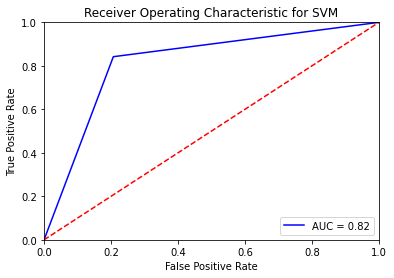

In [ ]:
plt.title('Receiver Operating Characteristic for SVM')
plt.plot(fpr_svm, tpr_svm, 'b', label = 'AUC = %0.2f' % auc_score_svm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

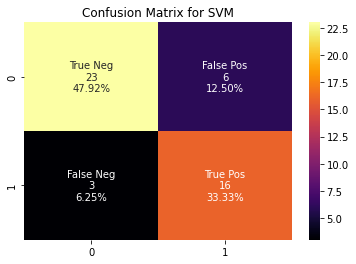

In [ ]:
plt.title('Confusion Matrix for SVM')
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='inferno')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

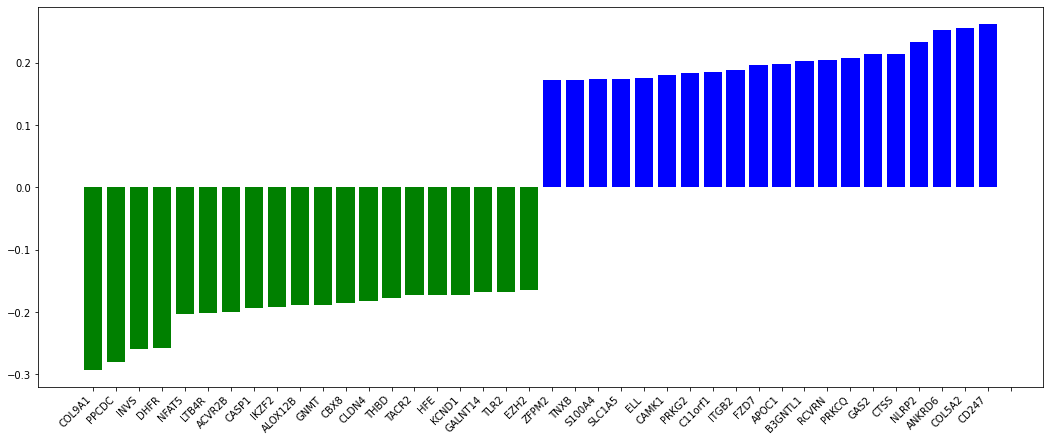

In [ ]:
#Feature resposible for the prediction

def feature_plot(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(18, 7))
 colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
 plt.show()

clf2 = SVC(kernel='linear',gamma="auto",C=0.1).fit(X,data_y.values.ravel())


feature_plot(clf2, data_x.columns.values)

In [ ]:
device ='cuda'

In [ ]:
import math

In [ ]:
import torch
import math
import pandas as pd
import numpy as np
import scipy as sp
np.random.seed(0)
torch.manual_seed(0)
import random
random.seed(0)


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,recall_score,precision_score,log_loss,roc_auc_score,roc_curve

import matplotlib
import matplotlib.pyplot as plt
 #%matplotlib inline

import torch
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader

In [ ]:
from torch import argmax

In [ ]:
evaluate_model(test_dl,model)

0.6041666666666666


0.6041666666666666

In [ ]:
x_train.shape[1]

5355

In [ ]:

Y_Test = to_categorical(y_test)

In [ ]:
Y_Test.shape[1]

2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D

In [ ]:
import keras

In [ ]:
print(x_train.shape)
print(x_test.shape)

(188, 5355)
(48, 5355)


In [ ]:
X_train = np.array(x_train).reshape(188, 5355, 1)
X_test = np.array(x_test).reshape(48, 5355, 1)

In [ ]:
X_train.shape

(188, 5355, 1)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 5354, 32)          96        
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 2677, 32)         0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 2676, 64)          4160      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 1338, 64)         0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 1337, 128)         16512     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 668, 128)        

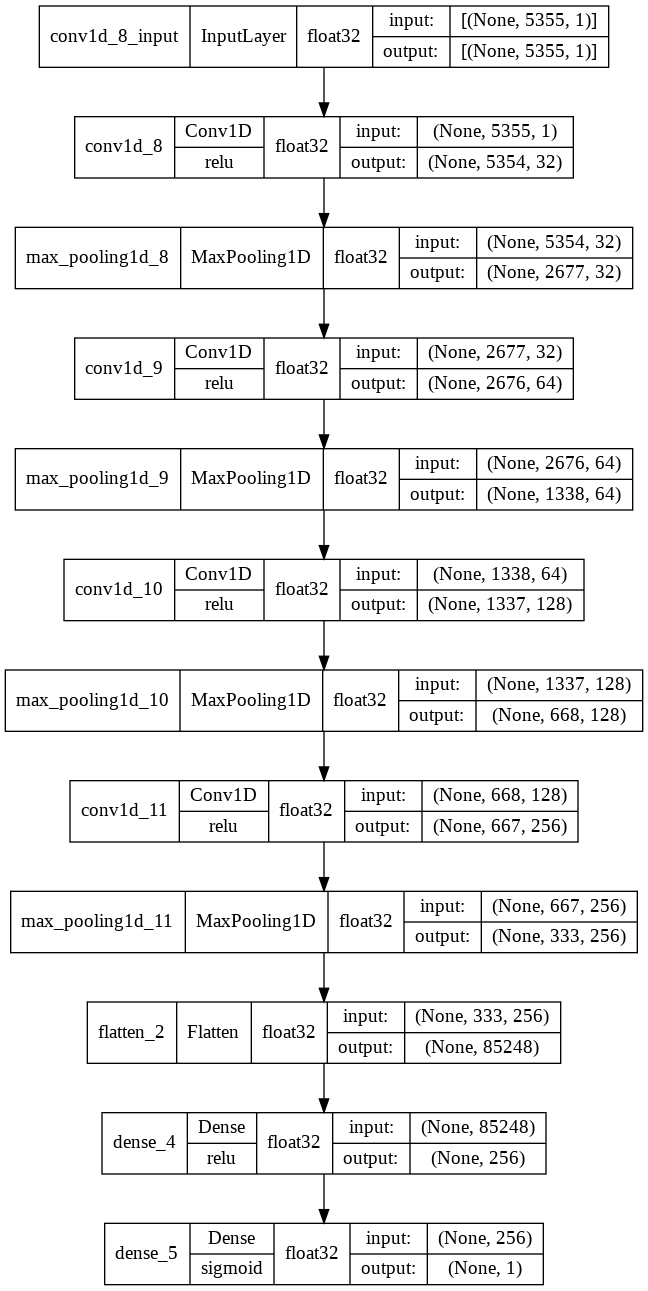

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None, show_layer_activations=True
)

In [ ]:
from tensorflow import keras

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import MaxPooling1D

In [ ]:
import random
random.seed(12345)
tf.random.set_seed(12345)
epochs = 25

model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(MaxPooling1D(2))
#model.add(BatchNormalization())
model.add(Conv1D(64, 2, activation='relu'))
model.add(MaxPooling1D(2))
#model.add(BatchNormalization())
model.add(Conv1D(128, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(256, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


#for i in rate:
optimizer = keras.optimizers.Adam(learning_rate=0.0015)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy','Recall','AUC','TruePositives','TrueNegatives','FalsePositives','FalseNegatives'])
history = model.fit(X_train, y_train, epochs = epochs, validation_data = (X_test, y_test), verbose=1)
test =  model.evaluate(X_test, y_test, verbose=1)
  #if test > 0.63:
print("Testing Accuracy: %.2f%%" % (test[1]*100))


Epoch 1/25
6/6 [==============================] - 8s 979ms/step - loss: 1.7473 - accuracy: 0.5532 - recall: 0.5526 - auc: 0.5721 - true_positives: 42.0000 - true_negatives: 62.0000 - false_positives: 50.0000 - false_negatives: 34.0000 - val_loss: 0.7460 - val_accuracy: 0.3958 - val_recall: 1.0000 - val_auc: 0.6089 - val_true_positives: 19.0000 - val_true_negatives: 0.0000e+00 - val_false_positives: 29.0000 - val_false_negatives: 0.0000e+00
Epoch 2/25
6/6 [==============================] - 5s 793ms/step - loss: 0.6936 - accuracy: 0.5638 - recall: 0.3816 - auc: 0.5116 - true_positives: 29.0000 - true_negatives: 77.0000 - false_positives: 35.0000 - false_negatives: 47.0000 - val_loss: 0.6712 - val_accuracy: 0.6042 - val_recall: 0.0000e+00 - val_auc: 0.5263 - val_true_positives: 0.0000e+00 - val_true_negatives: 29.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 19.0000
Epoch 3/25
6/6 [==============================] - 5s 788ms/step - loss: 0.6737 - accuracy: 0.5957 - recall: 

In [ ]:

tn = ([28,1],[9,10])

In [ ]:
tn = np.array(tn)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


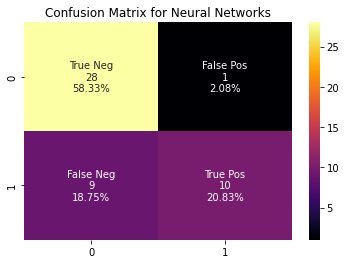

In [ ]:
plt.title('Confusion Matrix for Neural Networks')
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                tn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     tn.flatten()/np.sum(tn)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(tn, annot=labels, fmt='', cmap='inferno')
plt.show()

In [ ]:
def plot_result(history, epoch):
    
    epoch_range = range(1, epoch+1)
    
    plt.plot(epoch_range, history.history['accuracy'], label='Training acc')
    plt.plot(epoch_range, history.history['val_accuracy'], label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('epochs')
    plt.ylabel('acc')
    plt.legend(loc='upper left')
    plt.savefig('acc.jpg')

    plt.show()
    
    plt.plot(epoch_range, history.history['loss'], label='Training loss')
    plt.plot(epoch_range, history.history['val_loss'], label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(loc='upper left')
    plt.savefig('loss.jpg')

    plt.show()

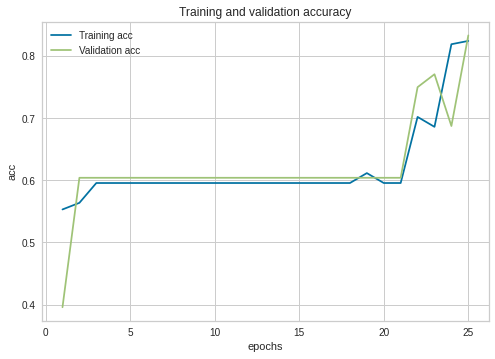

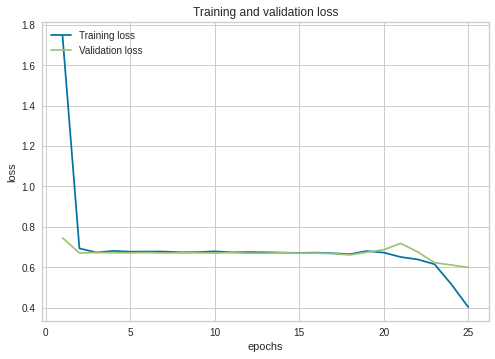

In [ ]:
plot_result(history, epochs)

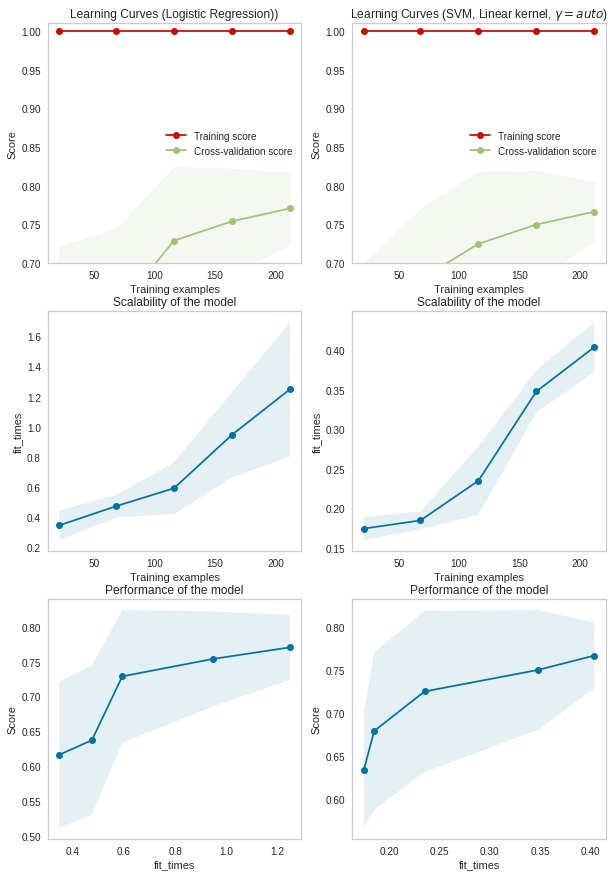

In [ ]:



import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))



title = "Learning Curves (Logistic Regression))"

cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
estimator = LogisticRegression(max_iter=1000,penalty='l2')
plot_learning_curve(
    estimator, title, X,data_y.values.ravel(), axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

title = r"Learning Curves (SVM, Linear kernel, $\gamma=auto$)"

cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
estimator = SVC(kernel='linear',gamma="auto",C=0.1)
plot_learning_curve(
    estimator, title, X,data_y.values.ravel(), axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()